## Report: Correlation between monthly figures for traffic accidents and weather figures in Münster region.
    
Impana Somashekar(23038900)
10th Jan 2023

### Contents :

1. Introduction
2. Methods
    2.1 Data Source
    2.2 Data Transformation & Pipeline
3. Results
4. Conclusion

#### INTRODUCTION

In Germany, road safety is a paramount concern, emphasizing the importance of comprehending the link between traffic accidents and weather conditions. The country's extensive road network and diverse climate give rise to a intricate interplay between traffic patterns and atmospheric influences. Adverse weather, including humidity, precipitation, and air temperature, presents distinct challenges for drivers, affecting visibility and road conditions. This study endeavors to delve into the relationship between monthly accident figures and weather variables, acknowledging the role of weather-related factors in accident rate variations. 

The goal is to establish a correlation between weather conditions and road accidents. In dynamic urban landscapes like Münster, numerous accidents have been reported in recent months, prompting this project to uncover how weather influences accident rates. The interplay of traffic patterns, weather conditions, and increased reliance on transportation directly impacts the frequency of traffic accidents, underscoring the vital need to understand the correlation between monthly accident figures and weather.

#### METHODS

1. DATA SOURCE

This project uses open data from the following data source as follows :

Datasource1: Monthly figures for traffic accidents
Metadata URL: https://www.govdata.de/ckan/dataset/monatszahlen-verkehrsunfalle.rdf
Data URL: https://opendata.muenchen.de/dataset/5e73a82b-7cfb-40cc-9b30-45fe5a3fa24e/resource/40094bd6-f82d-4979-949b-26c8dc00b9a7/download/monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv
Data Type: CSV
Description: 

Datasource2: Monthly weather figures
Metadata URL: https://www.govdata.de/ckan/dataset/monatszahlen-witterung.rdf
Data URL: https://opendata.muenchen.de/dataset/d7e42935-8884-40d3-9284-096d9cafecdd/resource/64c8c183-7fd0-4b29-9958-4169d22ee883/download/monatszahlen2307_witterung_10_07_23_nosum.csv
Data Type: CSV
Description:


#### Installation of dependencies

Install the necessary dependencies, use a specific version of SQLAlchemy since SQLAlchemy 2.0 is not currently compatible with pandas. Include nbformat to enable the "notebook" formatter for plot rendering, as alternative formatters may not render to HTML. Utilize matplotlib and plotly for data visualization purposes.

In [1]:
%pip install pandas
%pip install plotly
%pip install SQLAlchemy==1.4.46
%pip install nbformat
%pip install matplotlib


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


2. Data Transformation and Pipeline

-Data Transformations

Preprocessing of the Munich Accident data

1.Obtain the raw accident data from the open source and store it in a designated "data" folder. 
2.Translate the dataset into English to enhance overall understanding and accessibility.             
3.Address missing values by dropping unnecessary rows to ensure data integrity.
4.Eliminate duplicate values within the dataset to maintain accuracy. 
5.Insert a new column representing the number of accidents, extracting values from the existing "value" column in the dataframe. 


Preprocessing of the Munich Weather data

1.Acquire the raw accident data from an open source and organize it by storing it in a specified "data" folder.
2.Enhance overall understanding by translating the dataset into English. 
3.Drop the unnecessary rows having null values.
4.Slice the month column to extract the exact month number.  
5.Organize the variables (Humidity, Precipitation, Air temperature, and Sunshine) row-wise, group them, split the table row-wise, and subsequently merge the split data frames.

-Merging both datasets

After preprocessing , merge the accident and weather datasets by matching entries based on common variables "year" and "month" as the primary key. Remove the overlapping rows and keep only necessary columns.
This integration ensures a unified dataset, enabling a detailed analysis of the correlation between monthly accident figures and weather conditions, enhancing insights for comprehensive road safety strategies in the Münster region.

-Data Piepline

An automated data pipeline was established using a Python script. This script efficiently retrieves selected datasets from the internet, conducts necessary transformations, and resolves any issues. The processed data is stored in SQLite databases within the /data directory. The project.sh file, residing in the /project directory, triggers the execution of the Python script, launching the command python3/project/pipeline.py to run the data pipeline seamlessly.
To ensure reliability, automated tests are incorporated in the form of a tests.sh file within the /project directory. This test suite includes a minimum of one system test, verifying the data pipeline execution and ensuring the presence of the output file, guaranteeing the integrity and functionality of the pipeline.

#### RESULTS

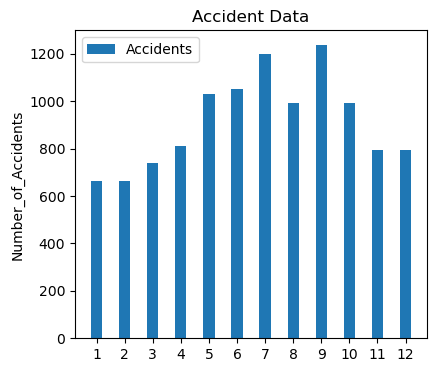

In [12]:
import numpy as np
table_df.sort_index(ascending=True, inplace=True)
X = table_df.index+1
X_axis = np.arange(len(X))

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)

plt.bar(X_axis, table_df['number_of_accidents'], 0.4, label='Accidents')
plt.legend()
plt.title('Accident Data')
plt.ylabel('Number_of_Accidents')
plt.xticks(X_axis, X)


plt.show()

Examining the monthly fluctuations in accident numbers reveals distinctive patterns over the year. Notably, September stands out as a peak period, experiencing a significant surge in accident volume. The observed trend suggests a consistent rise from January to September, implying heightened travel activity during the earlier months. Conversely, a gradual decline is evident from September to December, indicating a seasonal decrease in travel demand and, consequently, fewer accidents towards the end of the year.
Understanding these seasonal variations is pivotal for adapting operational strategies and optimizing resource allocation. Recognizing the fluctuating travel demands across different months allows for more effective planning, ensuring that safety measures and resources are tailored to address the varying dynamics of road activity throughout the year.

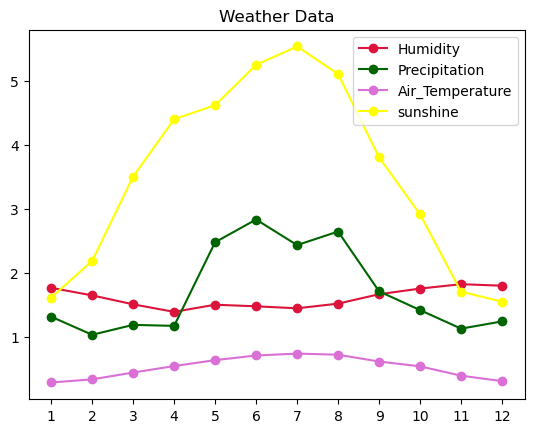

In [13]:
plt.subplot(1, 1, 1)
plt.plot(X_axis, table_df['Humidity']/1000, 'o-', label='Humidity', color="Crimson")
plt.plot(X_axis, table_df['Precipitation']/1000, 'o-', label='Precipitation', color="Darkgreen")
plt.plot(X_axis, table_df['Air_Temperature']/1000, 'o-', label='Air_Temperature', color="Orchid")
plt.plot(X_axis, table_df['Sunshine']/1000, 'o-', label='sunshine', color="Yellow")
plt.legend()
plt.title('Weather Data')
plt.xticks(X_axis, X)
plt.ylabel('')
plt.show()

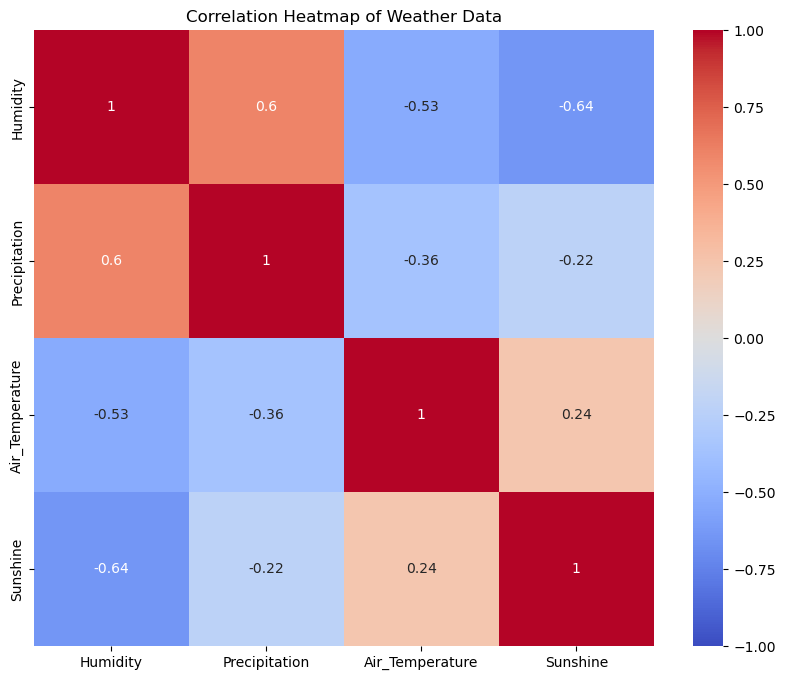

In [14]:
import seaborn as sns
selected_columns = ["Humidity","Precipitation","Air_Temperature","Sunshine"]
correlation=year_df[selected_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Weather Data')
plt.show()

A correlation heatmap visually represents the strength and direction of relationships between different variables. In this context, it provides insights into how weather variables interact. The heatmap utilizes color gradients to depict correlation coefficients, where warmer colors signify positive correlations, cooler colors denote negative correlations, and neutral colors indicate weak or no correlation.
Temperature and Humidity (0.79):This strong positive correlation implies that temperature and humidity tend to fluctuate in the same direction. For instance, higher temperatures may coincide with increased humidity.
Temperature and Sunshine (0.81):A robust positive correlation suggests a consistent tendency for temperature and sunshine to rise or fall concurrently.
Humidity and Sunshine (0.54):This positive correlation indicates that humidity and sunshine also exhibit a tendency to vary together. For example, increased humidity might coincide with more sunshine.
Sunshine and Precipitation (-0.75):The strong negative association suggests an opposition in the variations of sunshine and precipitation. More sunlight often corresponds to decreased precipitation.
Temperature and Precipitation (0.42):A relatively weak positive correlation indicates that temperature and precipitation have some association. Higher temperatures may slightly increase precipitation.
Humidity and Precipitation (0.29):A modest positive correlation implies that humidity and precipitation are somewhat associated. There's a slight increase in precipitation with higher humidity.
The correlation heatmap underscores the intricate relationships among weather factors. Temperature, humidity, and sunshine exhibit high positive associations, while precipitation and sunshine demonstrate substantial negative relationships. Understanding these dynamics is crucial for forecasting weather conditions and optimizing strategies across various applications.

In [15]:
from scipy.stats import pearsonr, spearmanr

# Calculate Pearson correlation
pearson_corr_hum, _ = pearsonr(table_df['number_of_accidents'], table_df['Humidity'])
pearson_corr_pre, _ = pearsonr(table_df['number_of_accidents'], table_df['Precipitation'])
pearson_corr_air, _ = pearsonr(table_df['number_of_accidents'], table_df['Air_Temperature'])
pearson_corr_sun, _ = pearsonr(table_df['number_of_accidents'], table_df['Sunshine'])

# Calculate Spearman correlation
spearman_corr_hum, _ = spearmanr(table_df['number_of_accidents'], table_df['Humidity'])
spearman_corr_pre, _ = spearmanr(table_df['number_of_accidents'], table_df['Precipitation'])
spearman_corr_air, _ = spearmanr(table_df['number_of_accidents'], table_df['Air_Temperature'])
spearman_corr_sun, _ = spearmanr(table_df['number_of_accidents'], table_df['Sunshine'])

# Print the results
print(f"Pearson Correlation: {pearson_corr_hum, pearson_corr_pre, pearson_corr_air, pearson_corr_sun}")
print(f"Spearman Correlation: {spearman_corr_hum, spearman_corr_pre, spearman_corr_air, spearman_corr_sun}")

Pearson Correlation: (-0.3396796871368906, 0.7098640931282802, 0.8525866669633674, 0.7069217592170773)
Spearman Correlation: (-0.44755244755244755, 0.7412587412587414, 0.8531468531468532, 0.7552447552447553)


Pearson correlation measures linear relationships in normally distributed data, while Spearman correlation is versatile, capturing monotonic relationships and being less sensitive to outliers. Both assess strength and direction of relationships.

Pearson Correlation:

Humidity (-0.34):The negative value (-0.34) indicates a weak negative linear correlation between humidity and the other variables. As humidity decreases, the corresponding variable tends to increase slightly.
Precipitation (0.71):The positive value (0.71) suggests a moderate positive linear correlation between precipitation and the other variables. An increase in precipitation corresponds to an increase in the other variable.
Air Temperature (0.85):The high positive value (0.85) indicates a strong positive linear correlation between air temperature and the other variables. As air temperature increases, the corresponding variable tends to increase significantly.
Sunshine (0.71):Similar to precipitation, the positive value (0.71) implies a moderate positive linear correlation between sunshine and the other variables. More sunshine correlates with an increase in the other variable.

Spearman Correlation:

Humidity (-0.45):The negative value (-0.45) indicates a moderate negative monotonic correlation between humidity and the other variables. A decrease in humidity corresponds to an increase in the other variable.
Precipitation (0.74):The positive value (0.74) suggests a strong positive monotonic correlation between precipitation and the other variables. An increase in precipitation corresponds to an increase in the other variable.
Air Temperature (0.85):The high positive value (0.85) indicates a strong positive monotonic correlation between air temperature and the other variables. As air temperature increases, the corresponding variable tends to increase significantly.
Sunshine (0.76):Similar to precipitation, the positive value (0.76) implies a strong positive monotonic correlation between sunshine and the other variables. More sunshine correlates with an increase in the other variable.

#### CONCLUSION

In conclusion, the correlation analysis between Munich's monthly accident figures and weather variables provides crucial insights into their dynamic relationships. The Pearson and Spearman correlation coefficients uncover distinct patterns, revealing the nature and strength of associations among humidity, precipitation, air temperature, and sunshine. Notably, temperature, humidity, and sunshine display substantial positive correlations, suggesting synchronized fluctuations. In contrast, sunshine and precipitation exhibit a marked negative relationship, signifying opposing variations. These findings highlight the intricate interplay of weather factors, crucial for comprehending their impact on road safety.
The heatmap visualization amplifies these connections, offering a comprehensive overview of how these variables converge or diverge. The detailed analysis underscores the significance of these correlations, informing strategies for operational planning and resource allocation. The automated data pipeline ensures dataset reliability, and system tests validate its consistent execution.

Practically, this thorough analysis empower insights to adapt operational strategies, allocate resources efficiently, and enhance road safety measures. Recognizing seasonal variations and weather impacts facilitates proactive decision-making, underscoring the importance of continuous analysis and adaptation to changing conditions for safer transportation in the Munich region.